<a href="https://colab.research.google.com/github/yibeiou/Smart_Logistics/blob/master/UsedCarPrice/Used_Car_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
PATH_FILE = '/content/drive/My Drive/Data/'

In [ ]:
data_train = pd.read_csv('/content/drive/My Drive/Data/used_car_train_20200313.csv', sep =' ')
data_test = pd.read_csv('/content/drive/My Drive/Data/used_car_testB_20200421.csv', sep =' ')

In [ ]:
data_train.shape

In [ ]:
data_test.shape

In [ ]:
data_test.columns

In [ ]:
data_train.replace(to_replace = '-', value = np.nan, inplace=True)
data_test.replace(to_replace = '-', value = np.nan, inplace=True)

In [ ]:
# Fill - notRepairedDamage
#data_train['notRepairedDamage'].fillna(0.8, inplace=True)
#data_test['notRepairedDamage'].fillna(0.8, inplace=True)
# Change Format - notRepairedDamage
#data_train['notRepairedDamage'] = pd.DataFrame(data_train['notRepairedDamage'], dtype=np.float)

In [ ]:
data_train.fillna(data_train.median(), inplace=True)
data_test.fillna(data_test.median(), inplace=True)

In [ ]:
data_train['model'][38424]=0

data_train['power'][data_train['power']==0] = 127
data_test['power'][data_test['power']==0] = 127
data_train['power'][data_train['power']>600] = 600
data_test['power'][data_test['power']>600] = 600

data_train['vehAge'] = ( data_train['creatDate'] - data_train['regDate'] ) / 10000
data_test['vehAge'] = ( data_test['creatDate'] - data_test['regDate'] ) / 10000

data_train.drop(index=38424, inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

In [ ]:
#data_train['v_13'] = pow(data_train['v_13'],2)
#data_test['v_13'] = pow(data_test['v_13'],2)

In [ ]:
tags = data_train.columns.tolist()
tags.remove('SaleID')
tags.remove('name')
tags.remove('seller')
tags.remove('offerType')
tags.remove('creatDate')
tags.remove('regDate')
tags.remove('v_1')
tags.remove('regionCode')
tags

['model',
 'brand',
 'bodyType',
 'fuelType',
 'gearbox',
 'power',
 'kilometer',
 'notRepairedDamage',
 'price',
 'v_0',
 'v_2',
 'v_3',
 'v_4',
 'v_5',
 'v_6',
 'v_7',
 'v_8',
 'v_9',
 'v_10',
 'v_11',
 'v_12',
 'v_13',
 'v_14',
 'vehAge']

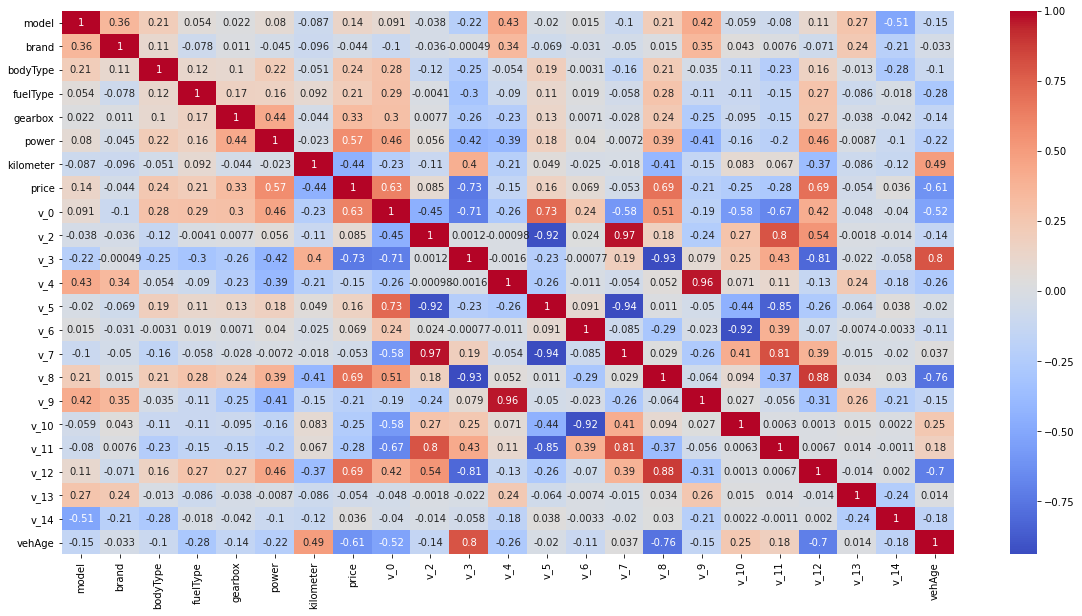

In [ ]:
# Check - Corr
plt.figure(figsize=(20,10))
corr = data_train[tags].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [ ]:
tags.remove('price')

In [ ]:
# Normalization
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(data_train[tags].values)
x_train = min_max_scaler.transform(data_train[tags].values)
x_test = min_max_scaler.transform(data_test[tags].values)

# Split dataset
y = data_train['price'].values
train_x, test_x, train_y, test_y = train_test_split(x_train, y, test_size=0.05)

# Build model
model =  keras.Sequential([
    keras.layers.Dense(250, activation='relu', input_shape=[len(tags)]),
    keras.layers.Dense(250, activation='relu'),
    keras.layers.Dense(250, activation='relu'), 
    keras.layers.Dense(250, activation='relu'),
    keras.layers.Dense(250, activation='relu'),
    keras.layers.Dense(250, activation='relu'),
    keras.layers.Dense(250, activation='relu'),
    keras.layers.Dense(1)
])
# Define loss function
model.compile(loss='mean_absolute_error', optimizer='Adam')

In [ ]:
# Train
model.fit(train_x, train_y, batch_size=256, epochs=100)

Epoch 1/100
557/557 [==============================] - 10s 18ms/step - loss: 1422.5938
Epoch 2/100
557/557 [==============================] - 10s 18ms/step - loss: 778.7610
Epoch 3/100
557/557 [==============================] - 10s 18ms/step - loss: 669.6780
Epoch 4/100
557/557 [==============================] - 10s 17ms/step - loss: 642.2990
Epoch 5/100
557/557 [==============================] - 10s 18ms/step - loss: 599.8531
Epoch 6/100
557/557 [==============================] - 10s 18ms/step - loss: 579.6066
Epoch 7/100
557/557 [==============================] - 10s 18ms/step - loss: 570.4339
Epoch 8/100
557/557 [==============================] - 10s 17ms/step - loss: 561.3248
Epoch 9/100
557/557 [==============================] - 10s 18ms/step - loss: 550.7722
Epoch 10/100
557/557 [==============================] - 10s 18ms/step - loss: 544.8481
Epoch 11/100
557/557 [==============================] - 10s 17ms/step - loss: 549.3711
Epoch 12/100
557/557 [=============================

In [ ]:
# Validation
print('Train dataset MAE:', mean_absolute_error(train_y, model.predict(train_x)))
print('Test dataset MAE:', mean_absolute_error(test_y, model.predict(test_x)))

Train dataset MAE: 433.5351162851909
Test dataset MAE: 457.51797326189677


In [ ]:
# Test Model
predict_y = model.predict(x_test)

# Output result: SaleID, price
result = pd.DataFrame()

result['SaleID'] = data_test.SaleID
result['price'] = predict_y

#plt.scatter(result['SaleID'],result['price'])
result.to_csv('/content/drive/My Drive/Data/ans_nn_10.csv', index=False)